---
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Cátedra de Investigación Operativa__\
__Autor: Rodrigo Maranzana__, Rmaranzana@frba.utn.edu.ar

---

In [8]:
import pulp
import matplotlib.pyplot as plt
import numpy as np

Modelizamos con PuLP

In [3]:
lp01 = pulp.LpProblem("planificacion-produccion", pulp.LpMinimize)

# Sets:
meses = range(6)
meses_1 = range(1, 6)

# Variables:
FHR = pulp.LpVariable.dicts('FHR', meses, 0, None, cat='Continuous')
FHE = pulp.LpVariable.dicts('FHE', meses, 0, None, cat='Continuous')
SF = pulp.LpVariable.dicts('SF', meses, 0, None, cat='Continuous')

# Parámetros:
D = [14_500, 15_500, 13_200, 12_100, 14_200, 16_000]
CHR = 125
CHE = 140
LFHR = 13_000
LFHE = 2_500
CS = 25
I0 = 0

# Función objetivo:
Z = [FHR[m] * CHR + FHE[m] * CHE + SF[m] * CS for m in meses]
lp01 += pulp.lpSum(Z), 'Z'

# Restricciones:
## Balance productivo 1er mes:
lp01 += FHR[0] + FHE[0] + I0 == SF[0] + D[0]

## Balance productivo meses siguientes:
for m in meses_1:
    lp01 += FHR[m] + FHE[m] + SF[m-1] == SF[m] + D[m]

## Capacidad:
for m in meses:
    lp01 += FHR[m] <= LFHR
    lp01 += FHE[m] <= LFHE

# Resolucion:
lp01.solve()

# Imprimimos el status del problema:
print(pulp.LpStatus[lp01.status])

# Imprimimos las variables en su valor óptimo:
for variable in lp01.variables():
    print("%s = %.2f" % (variable.name, variable.varValue))
    
# Imprimimos el funcional óptimo:
print(f'Función objetivo: {pulp.value(lp01.objective)}')

Optimal
FHE_0 = 1500.00
FHE_1 = 2500.00
FHE_2 = 200.00
FHE_3 = 0.00
FHE_4 = 1700.00
FHE_5 = 2500.00
FHR_0 = 13000.00
FHR_1 = 13000.00
FHR_2 = 13000.00
FHR_3 = 12100.00
FHR_4 = 13000.00
FHR_5 = 13000.00
SF_0 = -0.00
SF_1 = 0.00
SF_2 = 0.00
SF_3 = 0.00
SF_4 = 500.00
SF_5 = 0.00
Función objetivo: 10826000.0


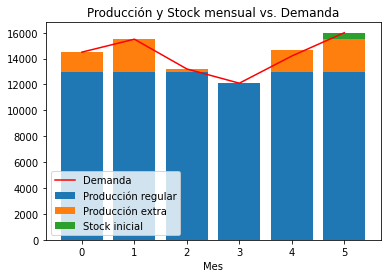

In [29]:
# Ploteo:
FHRa = np.array([v.varValue for v in FHR.values()])
FHEa = np.array([v.varValue for v in FHE.values()])
SFa = np.array([v.varValue for v in SF.values()])
SFa_desfase = np.insert(SFa, 0, 0)
SFa_desfase = SFa_desfase[:-1]

plt.bar(meses, FHRa, label="Producción regular")
plt.bar(meses, FHEa, bottom=FHRa, label="Producción extra")
plt.bar(meses, SFa_desfase, bottom=FHRa + FHEa, label="Stock inicial")
plt.plot(meses, D, label="Demanda", color='r')
plt.title("Producción y Stock mensual vs. Demanda")
plt.xlabel("Cantidad")
plt.xlabel("Mes")
plt.legend()
plt.show()

In [27]:
FHRa + FHEa

[13000.0,
 13000.0,
 13000.0,
 12100.0,
 13000.0,
 13000.0,
 1500.0,
 2500.0,
 200.0,
 0.0,
 1700.0,
 2500.0]